# Predicting Lipophilicity of Molecules

In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
import deepchem as dc
from deepchem.feat.mol_graphs import ConvMol
from rdkit.Chem import MolFromSmiles, Draw

In [49]:
df = pd.read_csv('Lipophilicity.csv')

In [50]:
df.head()

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


Let's look at the first molecule

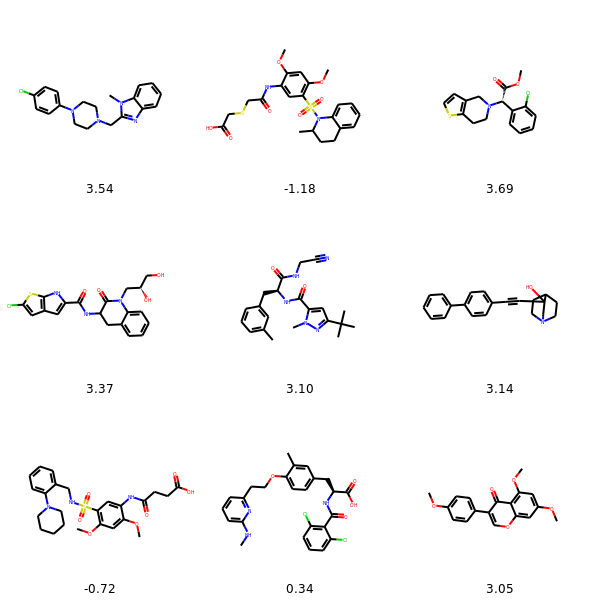

In [107]:
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
mols = []
for (ix,row) in df[:9].iterrows():
    m = MolFromSmiles(row.smiles)
    m.SetDoubleProp("exp", row.exp)
    mols.append(m)
    

img = Draw.MolsToGridImage(mols, molsPerRow=3, legends=["%.2f" % (float(m.GetProp('exp'))) for m in mols]); img

In [66]:
for ix, row in df[:10].iterrows():
    print(row.smiles)

Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)CCc3ccccc23
COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(Cl)sc4[nH]3
Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)NCC#N)c1
OC1(CN2CCC1CC2)C#Cc3ccc(cc3)c4ccccc4
COc1cc(OC)c(cc1NC(=O)CCC(=O)O)S(=O)(=O)NCc2ccccc2N3CCCCC3
CNc1cccc(CCOc2ccc(C[C@H](NC(=O)c3c(Cl)cccc3Cl)C(=O)O)cc2C)n1
COc1ccc(cc1)C2=COc3cc(OC)cc(OC)c3C2=O
Oc1ncnc2scc(c3ccsc3)c12
